# Activity Recognition Based on Body Parts Deformation Funtions
Alireza Parsay and Parsa Madinei

This document is for the shape analysis homework of the course ECE 594n at UCSB. Our primary data set is Florence 3D actions dataset, a pubic data set which is collecte at the University of Florence [1]. 
This data set includes 215 samples for 9 activites from 10 subjects who perform each activity two or three times. The activities are normal activities such as standing up, sittig down, reading a watch, etc.

The theoritical idea is from [2] which analyzes different data sets including the mentioned data set for activity detection. In this paper, the angle and translation transform between two different body parts at one time stamp is considered as a Lie Group of degree 3. The transformation matrix is as follows:

$
P(R,\overrightarrow{d})=\begin{bmatrix}
R & \overrightarrow{d}\\
0 & 1
\end{bmatrix}
$

However, we decided to cosider the only the angle differences between each body part to the next time sample. It is worth noting that we did not consider the translation since we believe the mojority of information is the angle evolution in time. Duing this, for each body part, we have a 2-dimensional Lie Group which is a sphere as will be shown.

In [2]:
import geomstats.backend as gs
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import geomstats.visualization as viz

INFO: Using numpy backend


At this part, we only load the data set from the ".txt" file to a numpy array.

In [3]:
pose=np.loadtxt("Florence_dataset_WorldCoordinates.txt", dtype=float)
print(pose.shape)

(4016, 48)


In [4]:
coordinates=np.zeros((15,2,4000))
for i in range(0,4000):
    iii = 0
    for ii in range(3,48,3):
        coordinates[iii,0,i] = pose[i,ii]
        coordinates[iii,1,i] = pose[i,ii+1]
        iii=iii+1

The result for differnt time samples of the activites with indices 1 and 2 for the participant with index 1.

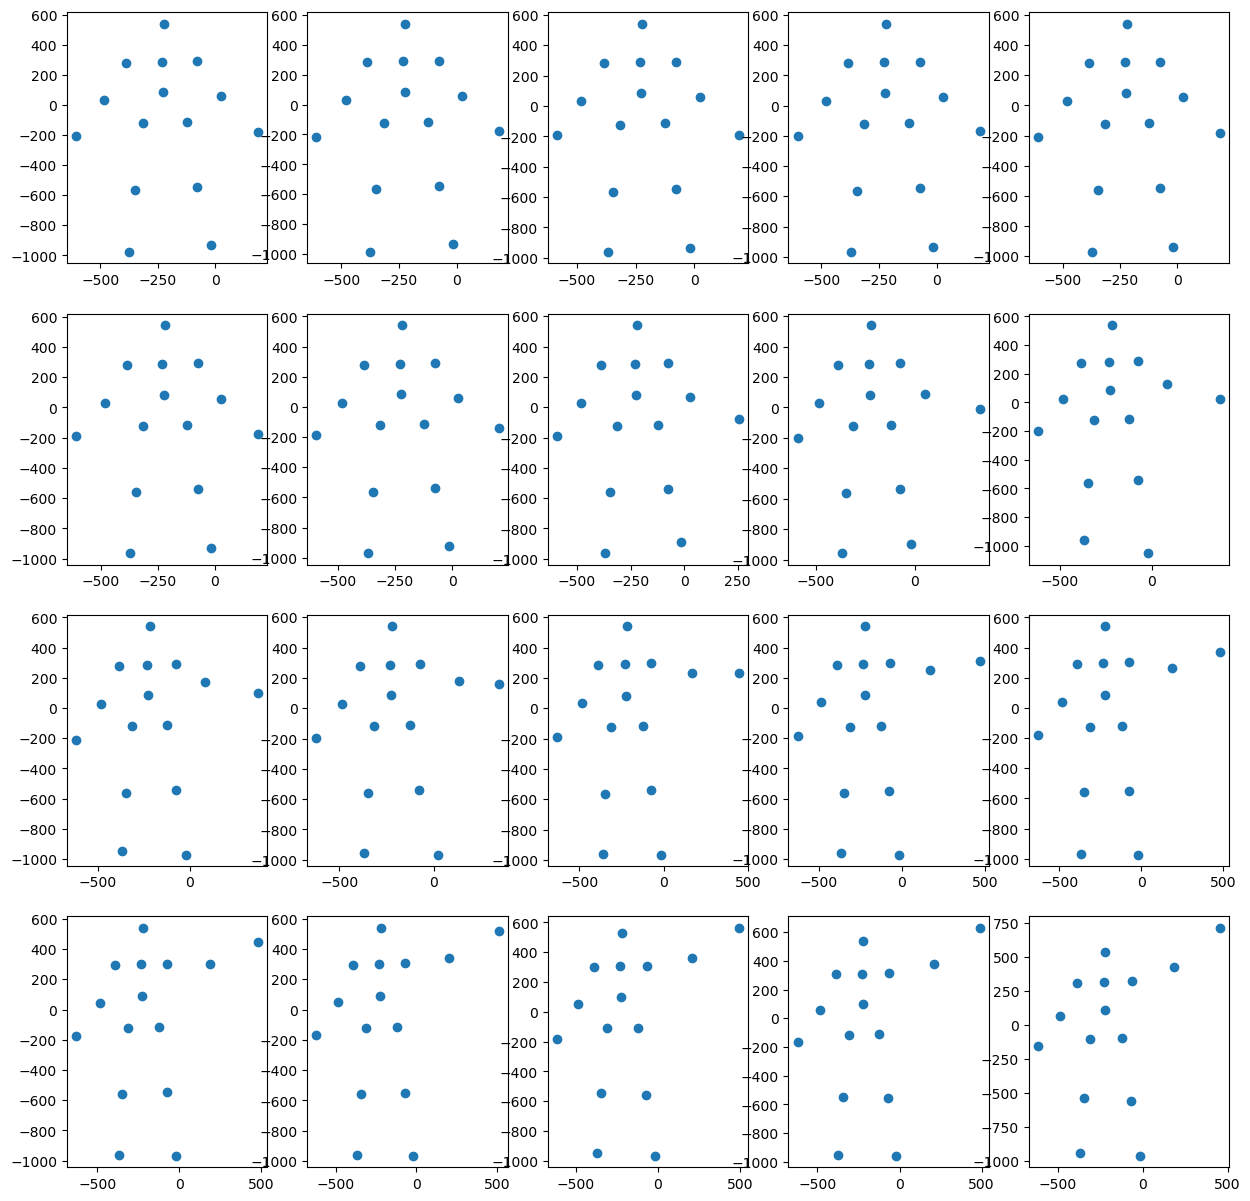

In [5]:
fig, axes = plt.subplots(4, 5,figsize=(15, 15))
for i in range(0,4):
    for ii in range(0,5):
        axes[i, ii].scatter(coordinates[:,0,4*i+ii],coordinates[:,1,5*i+ii])

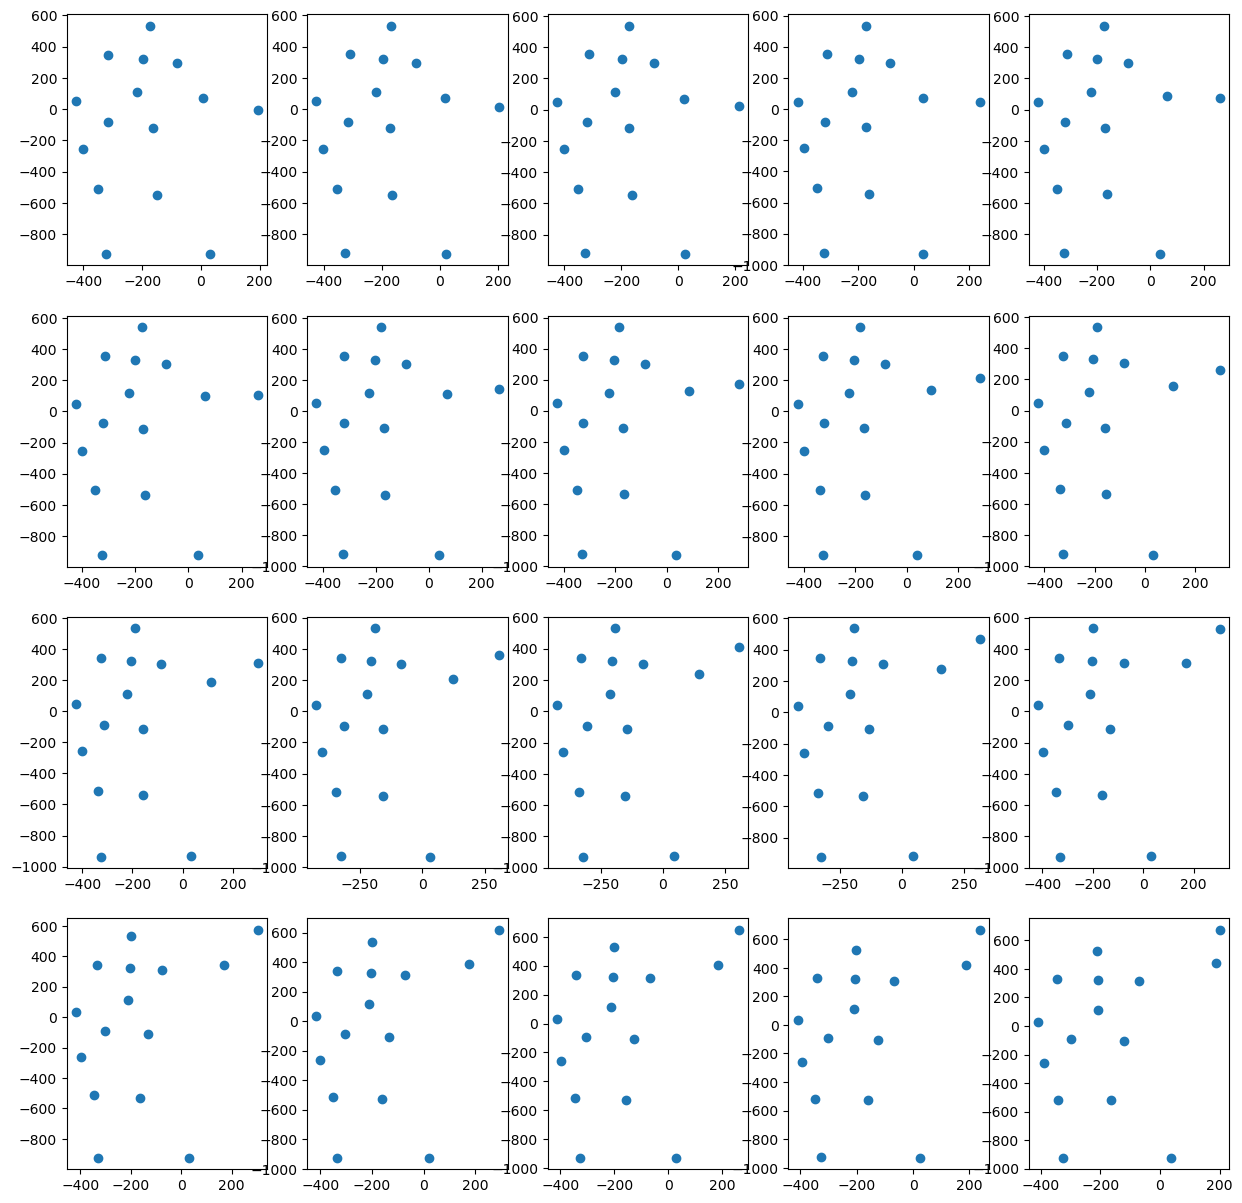

In [6]:
fig, axes = plt.subplots(4, 5,figsize=(15, 15))
for i in range(0,4):
    for ii in range(0,5):
        axes[i, ii].scatter(coordinates[:,0,89+4*i+ii],coordinates[:,1,89+5*i+ii])

At this part, we subtract, we calculate the angle between the vectors of left knee to ankle in two subsequent time samples. The result is for the participant index 1 doing activities 1 and 2 twice.

In [8]:
coordinates=np.zeros((16,3,4000))
for i in range(0,4000):
    iii=0
    for ii in range(3,48,3):
        coordinates[iii,0,i] = pose[i,ii]
        coordinates[iii,1,i] = pose[i,ii+1]
        coordinates[iii,2,i] = pose[i,ii+2]
        iii = iii+1

vecLeftFoot = coordinates[14,:,:]-coordinates[13,:,:]
vecLeftFoot = vecLeftFoot.T
def cart2sph(x, y, z):
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    el = np.arctan2(z, hxy)
    az = np.arctan2(y, x)
    return np.cos(el)*np.cos(az), np.cos(el)*np.sin(az), np.sin(el)
manif = np.zeros((4000,3))
for i in range(4000):
    x, y, z = cart2sph(vecLeftFoot[i,0],vecLeftFoot[i,1],vecLeftFoot[i,2])
    manif[i,0] = x
    manif[i,1] = y
    manif[i,2] = z

print(manif.shape)

(4000, 3)


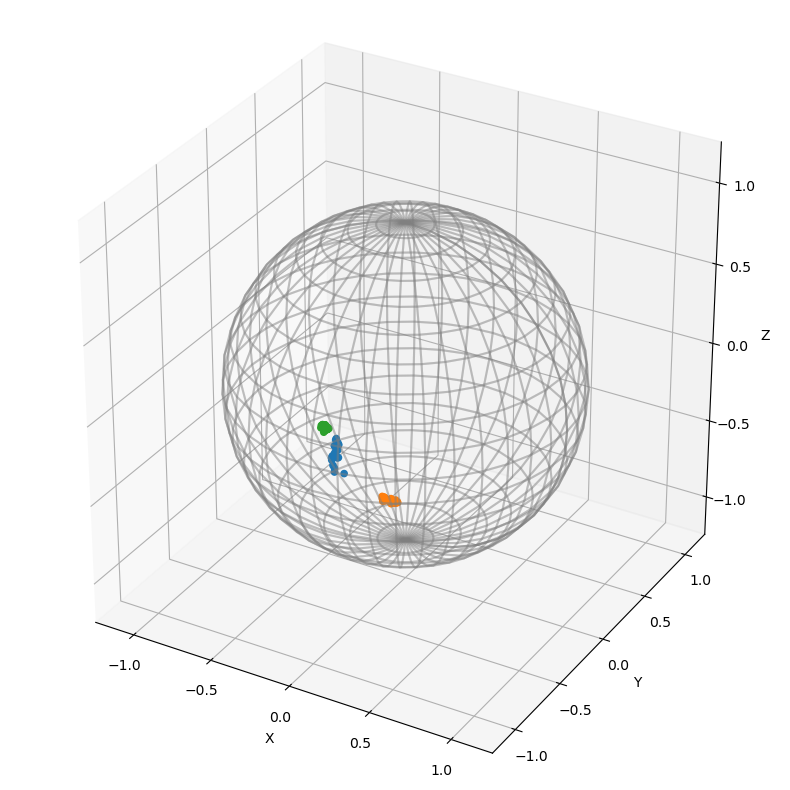

In [9]:
fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(111, projection="3d")


ax = viz.plot(points=manif[0:27,:], ax=ax, space="S2", s=20, alpha=1, label="Point")
ax = viz.plot(points=manif[89:120,:], ax=ax, space="S2", s=20, alpha=1, label="Point")
ax = viz.plot(points=manif[146:178,:], ax=ax, space="S2", s=20, alpha=1, label="Point")


# ax = viz.plot(points=manif, ax=ax, space=None, s=20, alpha=1, label="Point")
# ax=viz.Sphere()


For our project, we want to apply and ideally modified the Slepian Scale-Discretised Wavelets suggested in [3] for manifolds to analyze and classify the data.

# References
[1] https://www.micc.unifi.it/resources/datasets/florence-3d-actions-dataset/

[2] Human Action Recognition by Representing 3D Skeletons as Points in a Lie Group
*R. Vemulapalli, F. Arrate and R. Chellappa, "Human Action Recognition by Representing 3D Skeletons as Points in a Lie Group," 2014 IEEE Conference on Computer Vision and Pattern Recognition, Columbus, OH, USA, 2014, pp. 588-595, doi: 10.1109/CVPR.2014.82.

[3] Roddy, P.J. and McEwen, J.D., 2023. Slepian Scale-Discretised Wavelets on Manifolds. arXiv preprint arXiv:2302.06006.